### Project 2 - Titantic Dataset Analysis

The dataset that I used for this project was the Titantic Data set. The questions that I posed were to understand what three factors had the highest impact on the chance of survival for the passengers. I focused my analysis on the gender of the passenger to understand if one gender had a higher likelihood of surviving versus the other, the class of ticket that was purchased, as well as the age of the passengers to understand if there was a possible children first policy in loading of the lifeboats from the sinking Titanic. 

I hypothesize for the dataset below, females and children had a higher likelihood of survival as there could have potentially been a women and children first on the lifeboats before males. I also hypothesize that the first class ticketholders, regardless of their gender, will have the highest likelihood of survival.

My steps to analyzing the data are described below. 

In [116]:
#Importing the data into the notebook

import pandas as pd

df = pd.read_csv("titanic_data.csv")

print df.head()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


The dataset is separated by each passenger being its own row. To gain a better understanding of the amount of passengers within the analysis, I ran a count rows and return 891 passengers, regardless if they survived or not.

In [117]:
#Amount of passengers within the dataset

len(df)

891

### Data Cleansing

The data is then cleansed, meaning that we do not require the passengers' names, ticket, fare, and embarcation point. I will keep the following columns as they will be a part of my analysis: the Passenger ID, Survied (0 = not survived, 1 = survived), Pclass (Class of Ticket the passenger purchased), Sex (gender of the passenger), Age (there are some passengers with unknown ages and that will be discussed below), Sib Sp (the number of siblings/spouses the passenger had on board with them), Parch (the number of parents/children the passengers had on board with them), as well as the Cabin the passenger stayed in if known.

In [118]:
#Cleansing Data to remove unnecessary columns not needed for Analysis

df = df.drop(['Name', 'Ticket', 'Fare', 'Embarked'], axis = 1)
df.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin
0,1,0,3,male,22,1,0,NaN
1,2,1,1,female,38,1,0,C85
2,3,1,3,female,26,0,0,NaN


### Data Wrangling

The data needs to be checked for any null values in the columns to get a better understanding if all columns contain data. All of the columns except for the Age column contain some type of data that is not equal to null. The age column contains 177 null values so when we perform an analysis on the passengers' ages, those 177 null values will need to be removed from the dataset. Knowing that there are null values contained in the age column, the analysis can only be 80% confident in the results of passengers' ages and whether they played a factor in passengers surviving. 

In [125]:
#Analyzing if there are null values in the Pclass column

df['Pclass'].isnull().sum()

0

In [126]:
#Analyzing if there are null values in the Sex column

df['Sex'].isnull().sum()

0

In [128]:
#Analyzing if there are null values in the Age column

df['Age'].isnull().sum()

177

In [129]:
#Analyzing if there are null values in the SibSp column

df['SibSp'].isnull().sum()

0

In [130]:
#Analyzing if there are null values in the Parch column

df['Parch'].isnull().sum()

0

### Survived Passengers Analysis

The first analysis that will be performed on the dataset if the separation of passengers who survived and passengers who did not. The purpose of my analysis is to look into factors of survival rate so I will be most concern researching the surviving passengers. I then separated the passengers between their gender to see if one gender experienced a higher survival rate. The females had a higher survival rate and I suspect that could result from the women/children first policy. The Titanic had several lifeboats that they were able to load passengers onto and I suspect due to the higher number of females that survived compared to males, there was a policy to place women and children on the lifeboats before males. 

In [131]:
#Amount of Survived Passengers broken down by Gender

total_survivors = df[(df['Survived'] == 1)]
survivors = total_survivors[['Survived', 'Sex']]
survivors.groupby(['Sex']).count()

,Survived
Sex,
female,233
male,109


To further explore the female passengers in the dataset, they will be separated between whether they were travelling with siblings, spouses, parents, and children compared to females travelling alone. The first analysis shows that 99 females who survived travelled alone. I then created two functions, the first being a count of 96 survived females who travelled with either their sibling(s) or spouse; the second being a count of 80 survived females who travelled with either parents or children. I added the two counts together and found that a total of 176 survived females travelled with some type of companion. This leads me to believe that there was a policy in place in how the lifeboats were being loaded in that females and children were being loaded first, males last. The survival rate of the females is over double the survival rate of men, and 176 of those survived females were travelling with a companion. The analysis can be further explored to understand the ages of both the survived females and males to have more confidence in the policy of women and children being saved first.

In [132]:
#Count of survived females that travelled alone, the SipSp column is set to equal zero and the Parch is set to equal zero

females_travelling_alone = df[(df['Sex'] == 'female') & (df['Survived'] == 1) & (df['SibSp'] == 0) & (df['Parch'] == 0)] 
females_travelling_alone.count()['PassengerId']

99

In [133]:
#Count of survived females travelling with sibling(s) or spouse

females_travelling_SibSp = df[(df['Sex'] == 'female') & (df['Survived'] == 1) & (df['SibSp'] > 0)] 
females_travelling_SibSp.count()['PassengerId']

96

In [134]:
#Count of survived females travelling with parents or children

females_travelling_Parch = df[(df['Sex'] == 'female') & (df['Survived'] == 1) & (df['Parch'] > 0)] 
females_travelling_Parch.count()['PassengerId']


80

In [135]:
#The addition of the count of survived females travelling with sibling(s) or spouses and the count of survived females travelling
#with parents or children

96 + 80

176

### Survived Females Ages Visualization

The below histogram has the ages of the survived females travelling with the N/A values taken out. Bear in mind that this histogram does not include the N/A values of the females' ages so we can only say with great confidence the results below reflect the overall survived females' ages, we can't be 100% sure as all passengers' ages as some are not known. 

The histogram has three separate bars: (1) females who travelled alone, (2) females who travelled with siblings/spouses, and (3) females who travelled with parents/children. The first take away from the below histogram is that females who were travelling with some type of companion had the highest rate of survival in the age groups 0 - 5 which can be said with confidence that the policy of women and children first on the lifeboats was at play in this specific dataset. The biggest spike for females travelling alone is in the age group 20 - 27, which could be inferred those females were travelling from Europe to America in search of a better life alone. The largest spike for the females travelling with parents and children is in the mid to late twenties which could potentially be the mothers of the surviving female children. The spike for the females travelling with siblings and spouses had the largest spike out of the 3 types of survived females in the 50 age range which could signify those females were travelling with their husbands or siblings. 

For a future analysis and based on the histogram below, I suspect the age group for the survived males travelling with siblings/spouses to be somewhat reflective of the same females group. If the two groups have a similar pattern, it could signify the amount of married couples travelling together. 

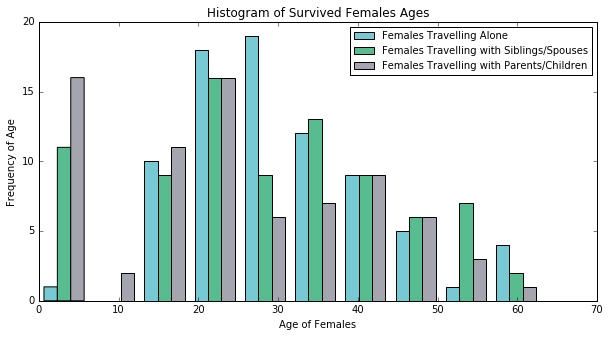

In [352]:
#histogram that shows all three types of survived females displayed on one plot

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

alone_females = females_travelling_alone.dropna(subset = ['Age'])
hist_alone_females = alone_females['Age'].astype(int)

females_SibSp = females_travelling_SibSp.dropna(subset = ['Age'])
hist_females_SibSp = females_SibSp['Age'].astype(int)

females_Parch = females_travelling_Parch.dropna(subset = ['Age'])
hist_females_Parch = females_Parch['Age'].astype(int)

plt.figure(figsize=(10, 5))

colors = ['#77C9D4', '#57BC90', '#A5A5AF']
labels = ['Females Travelling Alone', 'Females Travelling with Siblings/Spouses', 'Females Travelling with Parents/Children']
data = [hist_alone_females, hist_females_SibSp, hist_females_Parch]

plt.hist(data, histtype='bar', color= colors, label= labels)
plt.legend(prop={'size': 10})
plt.title('Histogram of Survived Females Ages')
plt.xlabel('Age of Females')
plt.ylabel('Frequency of Age')


plt.show()

### Survived Passengers by Class Hypothesis

The next question to address in my analysis is deciding if the class of ticket that was purchased had an influence on the survival rate. I hypothesize that the first class ticketed passengers had a higher rate of survival as the decks that were available to the first class were towards the top of the ship. The first class passengers were then able to get to the lifeboats more quickly because they were already towards the top of the ship. I suspect that the third class passengers will have the lowest rate of survival as their accomodations were located towards the bottom of the ship.

### Survived Passengers by Class Analysis

The first pie chart below represents the percentages of survived males in each of the three types of classes: first, second, and third. My hypothesis for the survived males proves to be true, however not by a far margin compared to the percentage of the third class male survivors. The survived males in the first class experienced a higher rate of survival because they were located in the top decks of the Titanic so they were able to get to the lifeboats. After the women and children were loaded onto the lifeboats, the men were then able to load the boats in available spaces. I was surprised to see that third class had almost the same amount of first class because the third class levels were located near the bottom of the boat so my assumption was that it would take much longer for the males to make their way up to the top. 

The second pie chart below represents the percentages of survived females in each of the three types of classes: first, second, and third. My hypothesis for the women was correct in that the first class had the highest rate of survival of females. The females staying in the first class decks were much closer to the lifeboats and were able to be loaded first on the lifeboats. The second highest class of survived females was the second class and the third class being last. The third class survived females could be the lowest because they were located towards the bottom of the Titanic and they might have been more concerned with getting their children to the top of the Titanic to load onto the lifeboats. 

The pie charts confirm that survived passengers who purchased first class tickets had the highest rate of survival due to their location on the Titanic and their proximity to the lifeboats. 


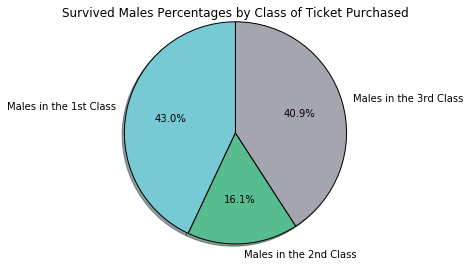

In [348]:
#Pie charts breaking down the survived passengers by gender and class of ticket purchased

survived_males_1class = df[(df['Sex'] == 'male') & (df['Survived'] == 1) & (df['Pclass'] == 1)] 
survived_males_2class = df[(df['Sex'] == 'male') & (df['Survived'] == 1) & (df['Pclass'] == 2)] 
survived_males_3class = df[(df['Sex'] == 'male') & (df['Survived'] == 1) & (df['Pclass'] == 3)] 

survived_females_1class = df[(df['Sex'] == 'female') & (df['Survived'] == 1) & (df['Pclass'] == 1)] 
survived_females_2class = df[(df['Sex'] == 'female') & (df['Survived'] == 1) & (df['Pclass'] == 2)] 
survived_females_3class = df[(df['Sex'] == 'female') & (df['Survived'] == 1) & (df['Pclass'] == 3)] 

males_1 = survived_males_1class.dropna(subset = ['Age'])
males_2 = survived_males_2class.dropna(subset = ['Age'])
males_3 = survived_males_3class.dropna(subset = ['Age'])
females_1 = survived_females_1class.dropna(subset = ['Age'])
females_2 = survived_females_2class.dropna(subset = ['Age'])
females_3 = survived_females_3class.dropna(subset = ['Age'])


x = males_1['PassengerId'].count()
y = males_2['PassengerId'].count()
z = males_3['PassengerId'].count()

t = females_1['PassengerId'].count()
u = females_2['PassengerId'].count()
v = females_3['PassengerId'].count()

sizes = [x, y, z]
sizes_1 = [t, u, v]
labels = ['Males in the 1st Class', 'Males in the 2nd Class', 'Males in the 3rd Class']
labels_1 = ['Females in the 1st Class', 'Females in the 2nd Class', 'Females in the 3rd Class']
colors = ['#77C9D4', '#57BC90', '#A5A5AF']


plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90, radius = 1, center=(0, 0))
plt.title('Survived Males Percentages by Class of Ticket Purchased')
plt.axis('equal')

plt.show()

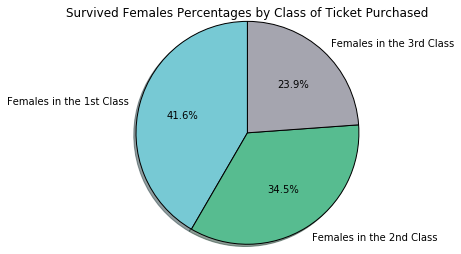

In [349]:
#Survived Females percentages by class of ticket purchased pie chart

plt.pie(sizes_1, labels=labels_1, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90, radius = 1, center=(0, 1))
plt.title('Survived Females Percentages by Class of Ticket Purchased')
plt.axis('equal')

plt.show()

### Average Age of Survived Passengers by Class Hypothesis

The analysis now reflects that survivors travelling in first class had the highest rate of survival, however the survived males in the 3rd class were very close to the first class. For the passengers' ages that are known, I hypothesize that survived males and females  in the first class will be older and had enough time to make it to lifeboats compared to survived males and females in the third class who will have a younger age and were able to manuver to the top of the Titanic.

### Average Age of Survived Passengers by Class Analysis

I took the average of the survived males' ages that were broken down by their class of ticket. My hypothesis is correct in that the survived males and females in the first class were older than the average survived males and females in the third class. The age of the survived males females in first class could be higher because they could have had more money available to them to purchase a first class ticket and could have been travelling for pleasure, whereas the survived males and females travelling in third class were in search of a better life than in Europe and had just enough money to travel on the Titanic in third class. I also conclude from the comparison of the average ages broken down by each class that the younger men and women travelling in third class were able to manuver to the top of the Titanic much more quickly than older survived men and women travelling in third class as well. I also believe that the third class survived passengers are at a younger age because there could have been more children travelling in second and third class and the dataset does validate that there was a women and children policy at work so the children were placed onto the lifeboats, regardless of their class of ticket.


In [350]:
#Average age of both genders broken down by their class of ticket purchased

avg_male_1 = males_1['Age'].mean()
avg_male_2 = males_2['Age'].mean()
avg_male_3 = males_3['Age'].mean()

avg_female_1 = females_1['Age'].mean()
avg_female_2 = females_2['Age'].mean()
avg_female_3 = females_3['Age'].mean()


print "Average age of survived males travelling in first class: ", int(avg_male_1)
print "Average age of survived males travelling in second class: ", int(avg_male_2)
print "Average age of survived males travelling in third class: ", int(avg_male_3)


print "Average age of survived females travelling in first class: ", int(avg_female_1)
print "Average age of survived females travelling in second class: ", int(avg_female_2)
print "Average age of survived females travelling in third class: ", int(avg_female_3)

Average age of survived males travelling in first class:  36
Average age of survived males travelling in second class:  16
Average age of survived males travelling in third class:  22
Average age of survived females travelling in first class:  34
Average age of survived females travelling in second class:  28
Average age of survived females travelling in third class:  19


### Conclusion

Overall, my initial hypothesis of women and children first onto the lifeboats proved to be correct. The histogram above reflects the women travelling with parents or children had the largest spike in the bins age 10 and lower. That spike indicates that those females were children and were placed onto the lifeboats first. The analysis on whether more women or men survived within this dataset also validates my hypothesis of more women survived. The pie chart analysis of the survived females also indicates survived females travelling in the first class had the highest rate of survival because they were located closer to the top of the Titanic and were able to manuver to the lifeboats more quickly than the women travelling in third class. I also believe that more mothers could have potentially been travelling in the third class and were more concerned to get their children to safety in the lifeboats. 

My hypothesis in regards to the class of ticket also had an affect on the survival rate, however it was not as dramatic of a difference for the survived males in the first and third class. The average age of men travelling in first class did contain the highest average age because they could have been more wealthy and more funds accessible to them and were travelling for leisure, whereas men who purchased third class tickets were potentially in search of a better life in America. I also believe that the average age of males in the third class was young because that could also be incorporating children who were travelling and were able to make it onto the lifeboats, regardless of their class of ticket. Young families were in search of a better and more prosperous life in America so I conclude that is the cause of the younger average ages of both men and women.


Overall, I believe that this dataset could contain a bias towards survived women as there were more survived women than double of survived men. I think that if the dataset was more balanced between survived females and males, there could be more analysis on if families were travelling together. I also believe that if all ages were present for the passengers within the dataset, a more confident conclusion could be drawn from using the age. The dataset contains 177 unknown ages for the entire dataset so that does leave a gap within the dataset to truly understand the ages of the passengers. Based on the ages provided, we can only make assumptions with great confidence of the majority of the passengers, but we cannot draw conclusions that are telling of the entire dataset.

I think that further analyzing how many families were travelling aboard the Titanic would be very interesting to further analyze. I think that would be more validation as to the women and children first policy as well as understanding the behavior of the survived passengers. Were survived males travelling alone more motivated to help others reach safety in third class or were those survived males in the third class travelling with their families. I think that the analysis would be very interesting to try and understand passengers' behavior to reaching safety on the lifeboats.


### Sources Used for Analysis:

http://matplotlib.org/examples/statistics/histogram_demo_multihist.html
https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Titanic_cutaway_diagram.png/687px-Titanic_cutaway_diagram.png
https://www.youtube.com/watch?v=ZyTO4SwhSeE
http://chrisalbon.com/python/pandas_index_select_and_filter.html
http://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html
http://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html#visualization-hist
http://chris.friedline.net/2015-12-15-rutgers/lessons/python2/03-data-types-and-format.html